In [ ]:
%matplotlib inline
#libraries
import numpy as
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import tree 
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler


from subprocess import check_output

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# import warnings
# warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')

In [ ]:
new_scmsp = dataset.copy()
#convert the datatype object to numeric
new_scmsp['Weight (Kilograms)'] = pd.to_numeric(new_scmsp['Weight (Kilograms)'],errors='coerce')
new_scmsp['Freight Cost (USD)'] = pd.to_numeric(new_scmsp['Freight Cost (USD)'],errors='coerce')



In [ ]:
missing_values =new_scmsp[new_scmsp['Shipment Mode'].isna()].index
new_scmsp= new_scmsp.drop(missing_values,axis=0).reset_index(drop = True)
new_scmsp['Dosage'] = new_scmsp['Dosage'].fillna(new_scmsp['Dosage'].mode()[0])
new_scmsp['Line Item Insurance (USD)'] =new_scmsp['Line Item Insurance (USD)'].fillna(new_scmsp['Line Item Insurance (USD)'].mean())

    # fill the missing values
new_scmsp['Weight (Kilograms)'] = new_scmsp['Weight (Kilograms)'].fillna(new_scmsp['Weight (Kilograms)'].mean())
new_scmsp['Freight Cost (USD)'] = new_scmsp['Freight Cost (USD)'].fillna(new_scmsp['Freight Cost (USD)'].mean())
#new_scmsp.isna().sum()

# Drop the columns not need longer
new_scmsp = new_scmsp.drop(['ID','PQ First Sent to Client Date', 'PO Sent to Vendor Date'],axis = 1)
new_scmsp.shape


(9964, 30)

In [ ]:
num_data = new_scmsp.select_dtypes(np.number)
print(num_data.columns)
print('The number of numerical columns:\t',len(num_data.columns))

Index(['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')
The number of numerical columns:	 8


In [ ]:
categorical_data = new_scmsp.select_dtypes('object')
print(categorical_data.columns)
print('The number of numerical columns:\t',len(categorical_data.columns))

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation'],
      dtype='object')
The number of numerical columns:	 22


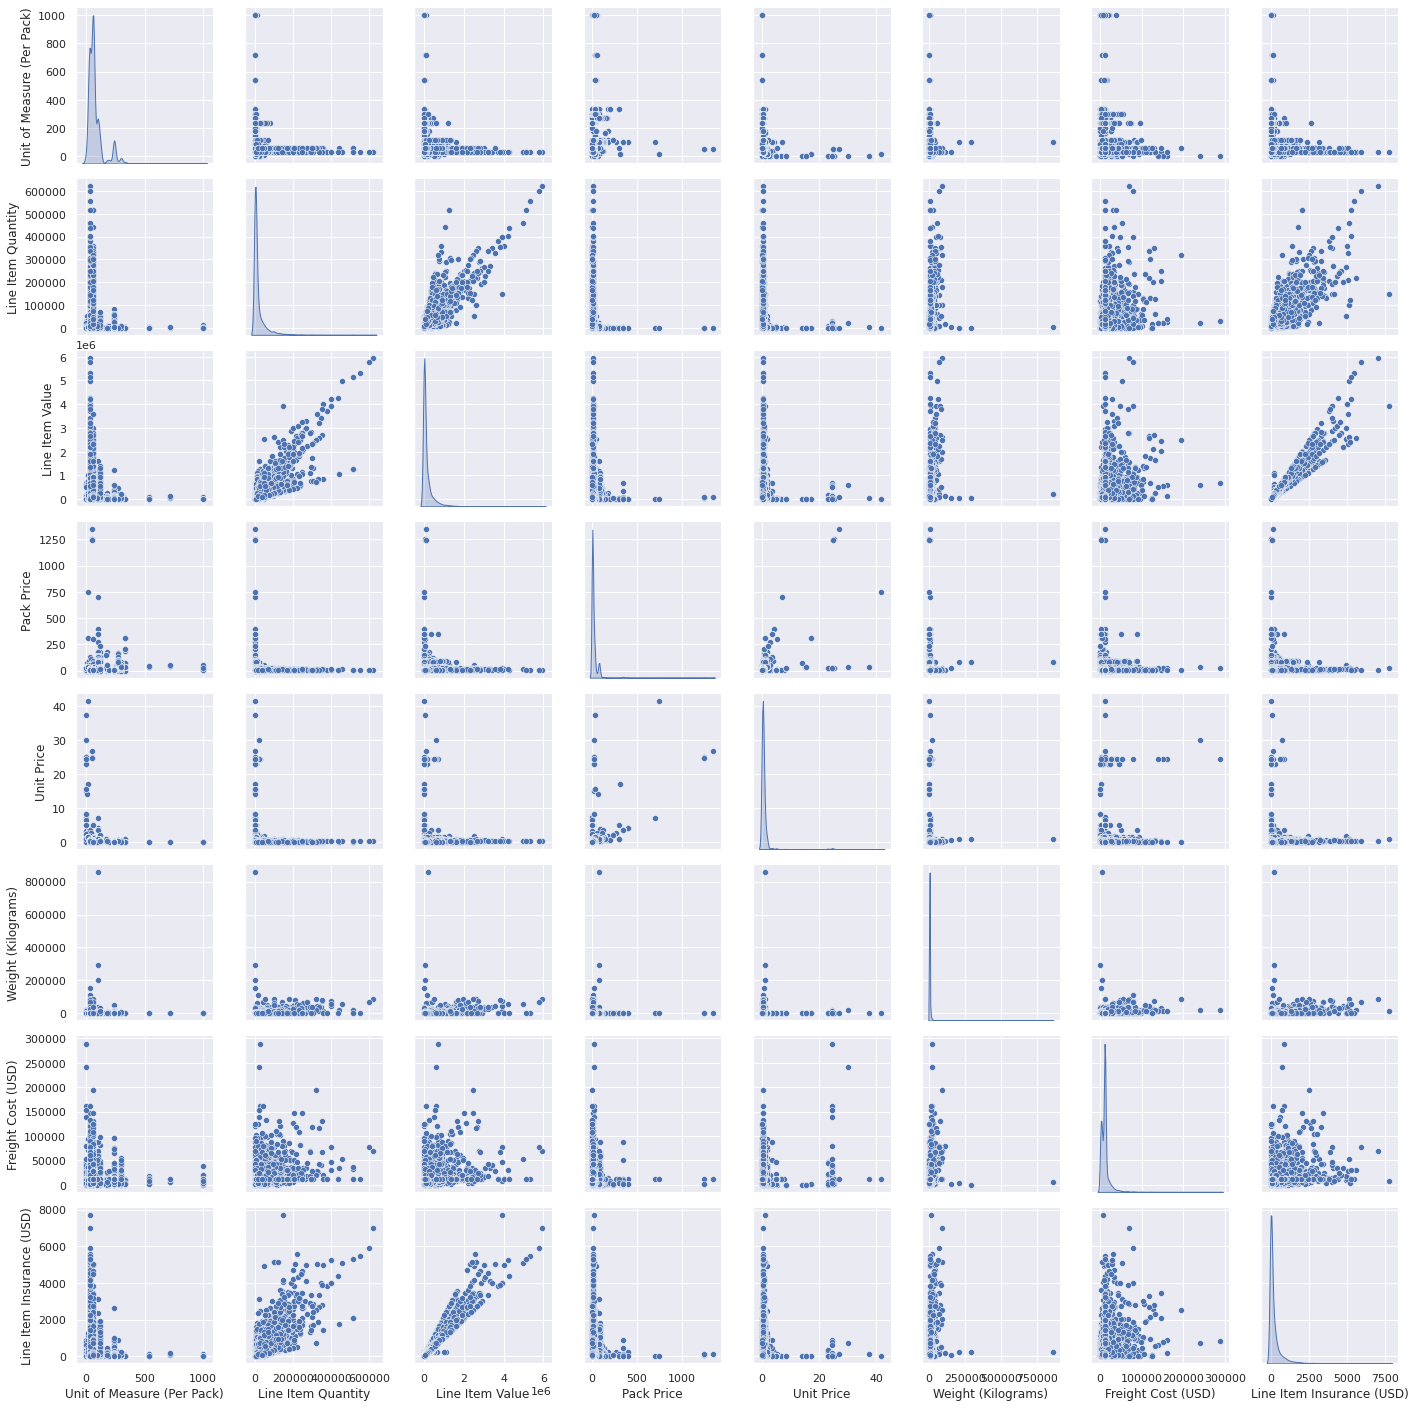

In [ ]:
# Pairplot 
sns.pairplot(num_data,diag_kind='kde')

In [ ]:
## testing new variables by checking their correlation w.r.t. MPG
new_scmsp['Price_Shipment'] = new_scmsp['Freight Cost (USD)'] + new_scmsp['Line Item Insurance (USD)']


In [ ]:
new_scmsp.shape
new_scmsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Project Code                9964 non-null   int64  
 1   PQ #                        9964 non-null   int64  
 2   PO / SO #                   9964 non-null   int64  
 3   ASN/DN #                    9964 non-null   int64  
 4   Country                     9964 non-null   int64  
 5   Managed By                  9964 non-null   int64  
 6   Fulfill Via                 9964 non-null   int64  
 7   Vendor INCO Term            9964 non-null   int64  
 8   Shipment Mode               9964 non-null   int64  
 9   Scheduled Delivery Date     9964 non-null   int64  
 10  Delivered to Client Date    9964 non-null   int64  
 11  Delivery Recorded Date      9964 non-null   int64  
 12  Product Group               9964 non-null   int64  
 13  Sub Classification          9964 

In [ ]:
le = LabelEncoder()
for i in categorical_data:
  new_scmsp[i] =le.fit_transform(new_scmsp[i].astype(str))

In [ ]:
X = new_scmsp.drop(['Price_Shipment'],axis= 1)
y = new_scmsp[['Price_Shipment']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22)

In [ ]:
#fit random forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train,y_train) * 100, 2)


print("Random Forest Accuracy : ",acc_random_forest)

acc_random_forest_testdata = round(random_forest.score(X_test, y_test) * 100, 2)
print('Test data Random forest Accuacy :',acc_random_forest_testdata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy :  99.81
Test data Random forest Accuacy : 99.78


In [ ]:
model=RandomForestRegressor(n_estimators=150,max_features=5,min_samples_leaf=25)
cv_res=cross_val_score(model,X_train,y_train,cv=10)
print(cv_res.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

78.18837547100543


In [ ]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,Y_prediction)
print(mse1)

268757.3983392534


# **Feature Selection by correlation Matrix**

In [ ]:
corr_matrix =new_scmsp.corr()
corr_matrix['Price_Shipment'].sort_values(ascending=False)

Price_Shipment                1.000000
Freight Cost (USD)            0.999291
Line Item Value               0.393128
Line Item Insurance (USD)     0.359066
Line Item Quantity            0.339511
Weight (Kilograms)            0.234694
Project Code                  0.133643
Unit Price                    0.121931
Dosage Form                   0.113721
Vendor                        0.069854
Product Group                 0.048888
Country                       0.030426
Dosage                        0.027115
Scheduled Delivery Date       0.026924
PO / SO #                     0.016426
Vendor INCO Term              0.015133
Manufacturing Site            0.013854
Shipment Mode                 0.012429
First Line Designation        0.004525
Fulfill Via                   0.000834
Managed By                   -0.000493
ASN/DN #                     -0.002181
Delivery Recorded Date       -0.003586
Delivered to Client Date     -0.008584
Pack Price                   -0.011791
Item Description         

In [ ]:
le = LabelEncoder()
for i in categorical_data:
  new_scmsp[i] =le.fit_transform(new_scmsp[i].astype(str))

In [ ]:
corr_matrix =new_scmsp.corr()
corr_matrix['Price_Shipment'].sort_values(ascending=False)

Price_Shipment                1.000000
Freight Cost (USD)            0.999291
Line Item Value               0.393128
Line Item Insurance (USD)     0.359066
Line Item Quantity            0.339511
Weight (Kilograms)            0.234694
Unit Price                    0.121931
Dosage                        0.112353
Vendor                        0.051934
Manufacturing Site            0.051910
Product Group                 0.048888
PO / SO #                     0.036296
Item Description              0.019069
ASN/DN #                      0.017629
Vendor INCO Term              0.015133
Shipment Mode                 0.012429
Delivery Recorded Date        0.011570
PQ #                          0.004923
First Line Designation        0.004525
Delivered to Client Date      0.003240
Scheduled Delivery Date       0.001949
Fulfill Via                   0.000834
Managed By                   -0.000493
Dosage Form                  -0.010193
Pack Price                   -0.011791
Country                  

# **Feature Selction by Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

feature_sel_model.get_support()


# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

feature_sel_model.get_support()
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('selected features: {}'.format(selected_feat))

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

selected features: Index(['Project Code', 'PQ #', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Pack Price',
       'Freight Cost (USD)', 'Line Item Insurance (USD)'],
      dtype='object')
total features: 30
selected features: 10


# ***Select the Feature by Forword Selection***

In [ ]:
target=new_scmsp[['Price_Shipment']]

def forward_selection(new_scmsp, target, significance_level=0.05):
    initial_features =new_scmsp.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
          model = sm.OLS(target, sm.add_constant(new_scmsp[best_features+[new_column]])).fit()
          new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


print(forward_selection(X_train,y_train))
print('Total Feature is ',len(forward_selection(X_train,y_train)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['Freight Cost (USD)', 'Line Item Quantity', 'Line Item Insurance (USD)', 'Shipment Mode', 'Line Item Value', 'Scheduled Delivery Date', 'PO / SO #', 'Weight (Kilograms)', 'PQ #', 'ASN/DN #', 'Dosage', 'Unit Price', 'Item Description', 'Delivered to Client Date', 'Manufacturing Site', 'Vendor', 'Molecule/Test Type', 'Delivery Recorded Date']
Total Feature is  18


In [ ]:
train_x2  =new_scmsp[['Freight Cost (USD)', 'Line Item Value', 'Line Item Insurance (USD)', 
 'Delivery Recorded Date', 'Weight (Kilograms)', 'Line Item Quantity', 
 'Delivered to Client Date', 'PO / SO #', 'ASN/DN #', 'Brand', 'Project Code']]

#train_y2 = new_scmsp['Price_Shipment']

train_y2 = new_scmsp[['Price_Shipment']]

# **Train The model**

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(train_x2,train_y2, test_size = 0.33)

In [ ]:
#fit decision tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train_x,train_y)
Y_pred = decision_tree.predict(test_x)
acc_decision_tree = round(decision_tree.score(train_x,train_y) * 100, 2)

print('Decision tree Accuacy :',acc_decision_tree)
#print("Random Forest Accuracy : ",acc_random_forest)
acc_testdata = round(decision_tree.score(test_x, test_y) * 100, 2)
print('Test data Decision tree Accuacy :',acc_testdata)

Decision tree Accuacy : 100.0
Test data Decision tree Accuacy : 99.89


In [ ]:
#fit random forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(train_x,train_y)
Y_prediction = random_forest.predict(test_x)

random_forest.score(train_x,train_y)
acc_random_forest = round(random_forest.score(train_x,train_y) * 100, 2)


print("Random Forest Accuracy : ",acc_random_forest)

acc_random_forest_testdata = round(random_forest.score(test_x, test_y) * 100, 2)
print('Test data Random forest Accuacy :',acc_random_forest_testdata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy :  99.76
Test data Random forest Accuacy : 99.64


In [ ]:
model=RandomForestRegressor(n_estimators=150,max_features=5,min_samples_leaf=25)
cv_res=cross_val_score(model,train_x,train_y,cv=10)

cv_res1 = cross_val_score(model,test_x,test_y, cv = 10)
print(cv_res.mean()*100)
print(cv_res1.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

90.24692699209945
90.34757622696313


In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(train_x,train_y)
Y_prediction = random_forest.predict(test_x)

random_forest.score(train_x,train_y)
acc_random_forest = round(random_forest.score(train_x,train_y) * 100, 2)


print("Random Forest Accuracy : ",acc_random_forest)

acc_random_forest_testdata = round(random_forest.score(test_x, test_y) * 100, 2)
print('Test data Random forest Accuacy :',acc_random_forest_testdata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Accuracy :  99.86
Test data Random forest Accuacy : 99.93
